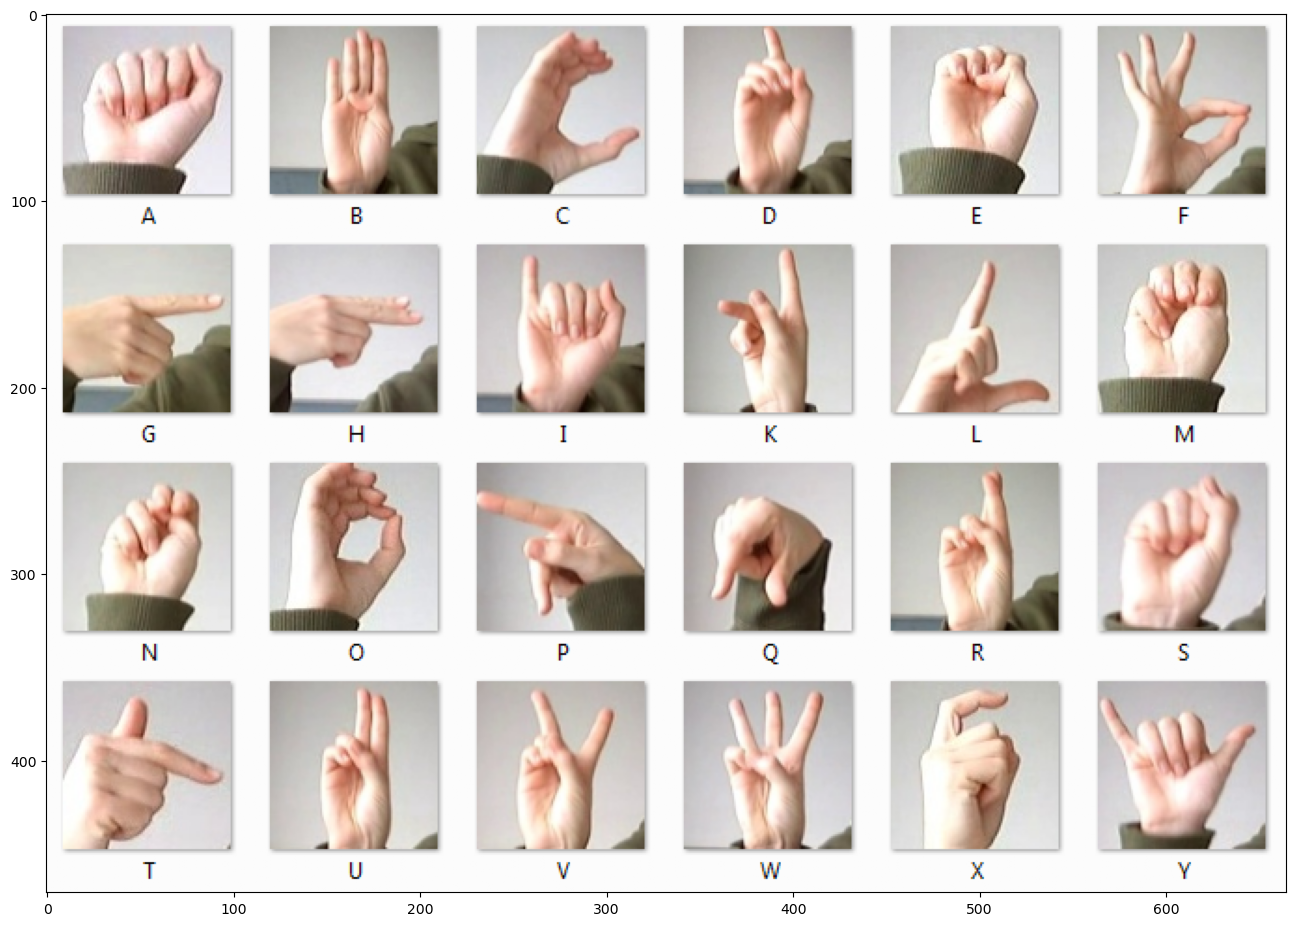

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('/kaggle/input/sign-language-mnist/amer_sign2.png')
plt.imshow(img)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
df_train = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
df_test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
df_train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [6]:
df_train['label'].nunique()

24

In [7]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [9]:
size  = 28
channels = 1
batch = 128
epochs = 100

In [10]:
X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


# Data Augmentation

In [11]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, y_test)

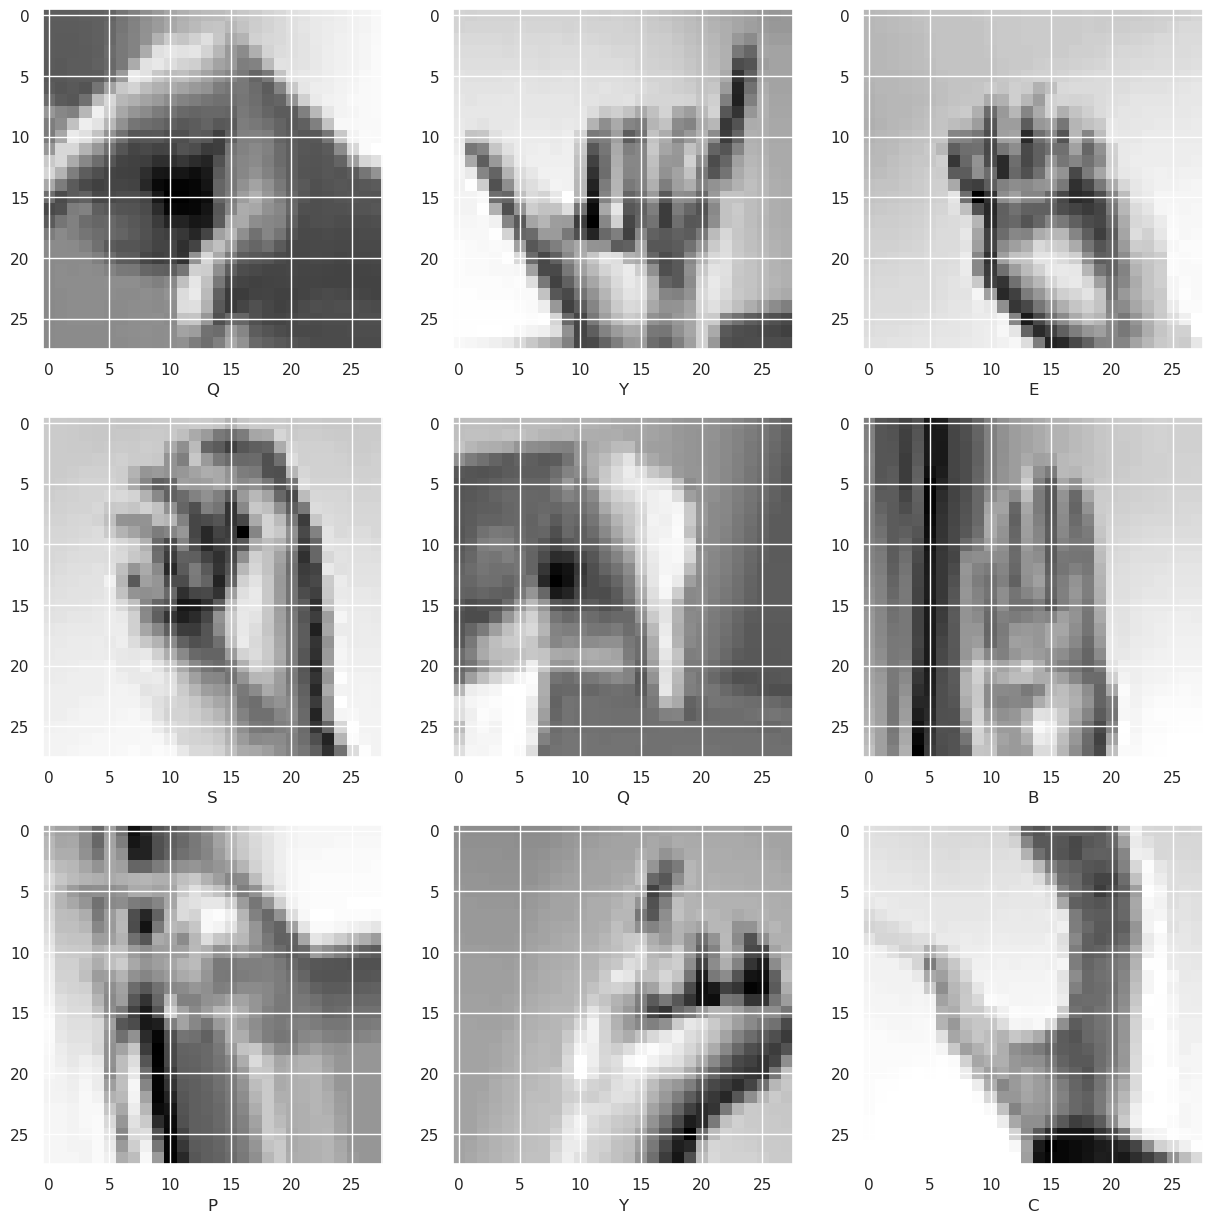

In [12]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[i]
        plt.imshow(image, cmap='gray')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.show()

# Model

In [13]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                 
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                    
                    
                    Flatten(),
                    
                    Dense(units=4096, activation="relu"),                 
                    Dropout(0.2),
                    
                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),
                                  
                    Dense(units=256, activation="relu"),
                    Dropout(0.2),
                    
                    Dense(units=25, activation="softmax"),
])
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [14]:
len(Model.layers)

17

# Optimization

In [15]:
opt=tf.keras.optimizers.Adam(0.0001)
Model.compile(optimizer=opt,loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard
earlystop=EarlyStopping(patience=10)
filepath = "sign_language.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'sign_language.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)
callbacks_list = [checkpoint, csv_logger,earlystop,callback_learningrate] 

In [17]:
history = Model.fit(X_train, validation_data=X_test, epochs=epochs, callbacks=callbacks_list)

Epoch 1/100


2023-08-04 17:41:10.797315: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


215/215 [==============================] - ETA: 0s - loss: 3.1890 - accuracy: 0.0459
Epoch 1: val_accuracy improved from -inf to 0.02510, saving model to sign_language.h5
215/215 [==============================] - 31s 94ms/step - loss: 3.1890 - accuracy: 0.0459 - val_loss: 3.1975 - val_accuracy: 0.0251 - lr: 1.0000e-04
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 3.0431 - accuracy: 0.0867
Epoch 2: val_accuracy improved from 0.02510 to 0.10471, saving model to sign_language.h5
215/215 [==============================] - 20s 92ms/step - loss: 3.0431 - accuracy: 0.0867 - val_loss: 2.8829 - val_accuracy: 0.1047 - lr: 1.0000e-04
Epoch 3/100
215/215 [==============================] - ETA: 0s - loss: 2.7747 - accuracy: 0.1438
Epoch 3: val_accuracy improved from 0.10471 to 0.19618, saving model to sign_language.h5
215/215 [==============================] - 21s 96ms/step - loss: 2.7747 - accuracy: 0.1438 - val_loss: 2.5277 - val_accuracy: 0.1962 - lr: 1.0000e-04
Epoch 4

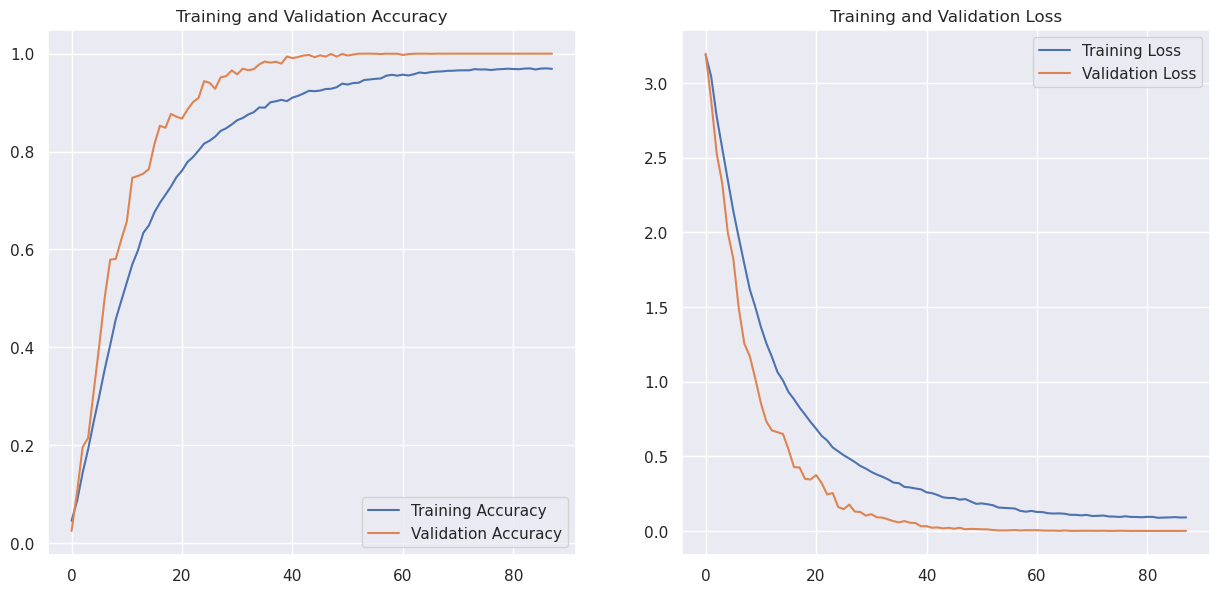

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate

In [19]:
score = Model.evaluate(X_test) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Test loss: 0.0014401719672605395
Test accuracy: 1.0


# Test

In [20]:
df_test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [21]:
y_pred = np.argmax(Model.predict(X_test),axis = 1)

225/225 [==============================] - 1s 2ms/step


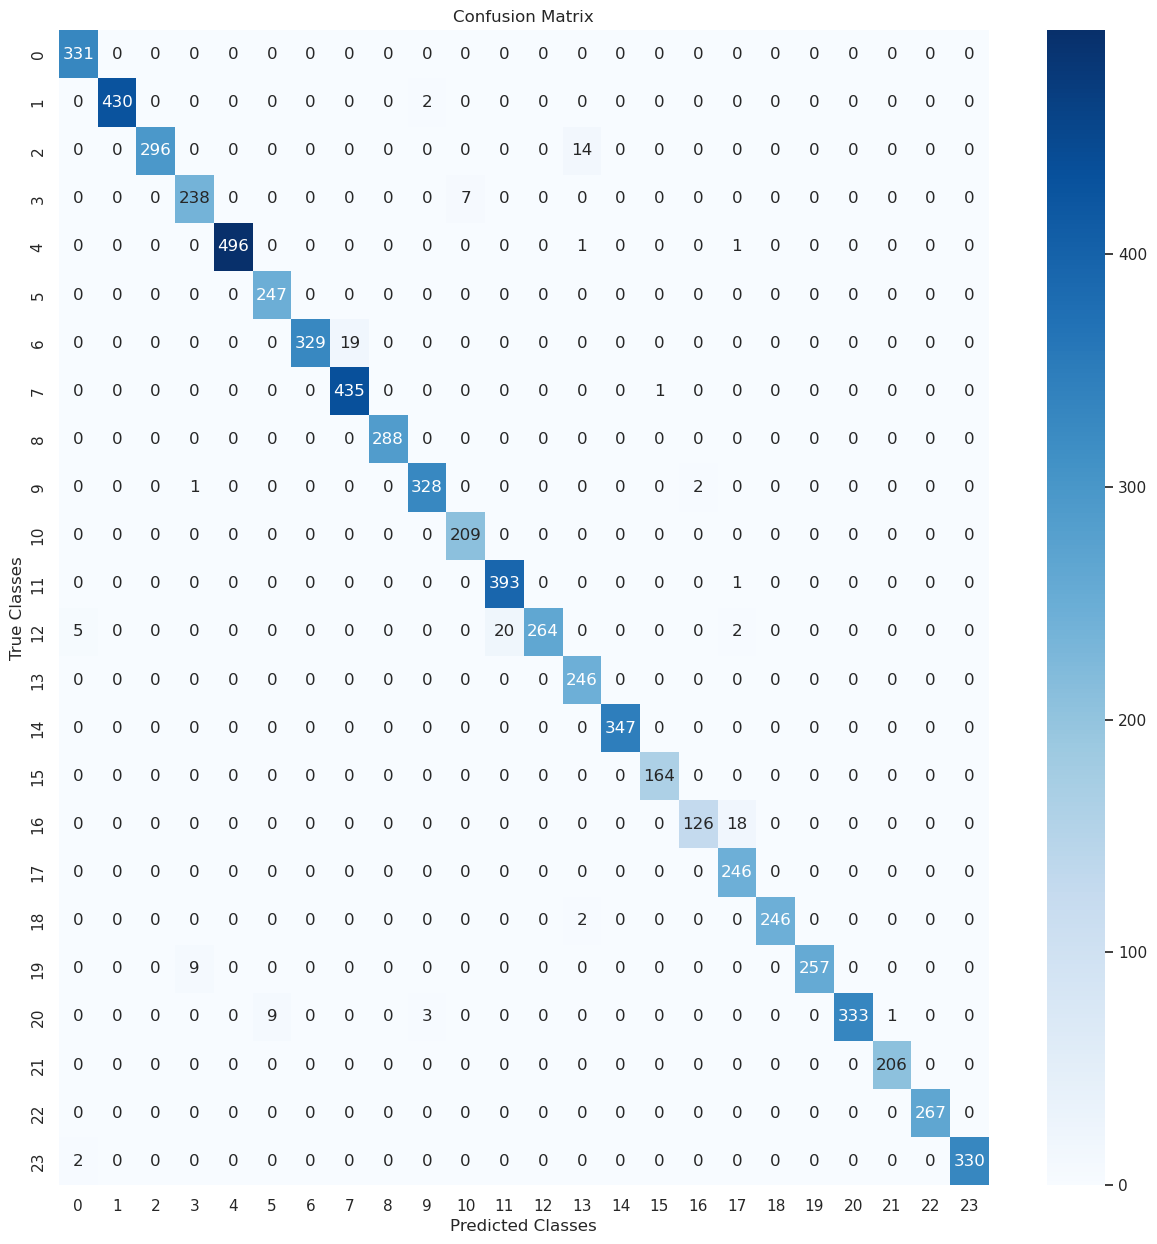

In [22]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

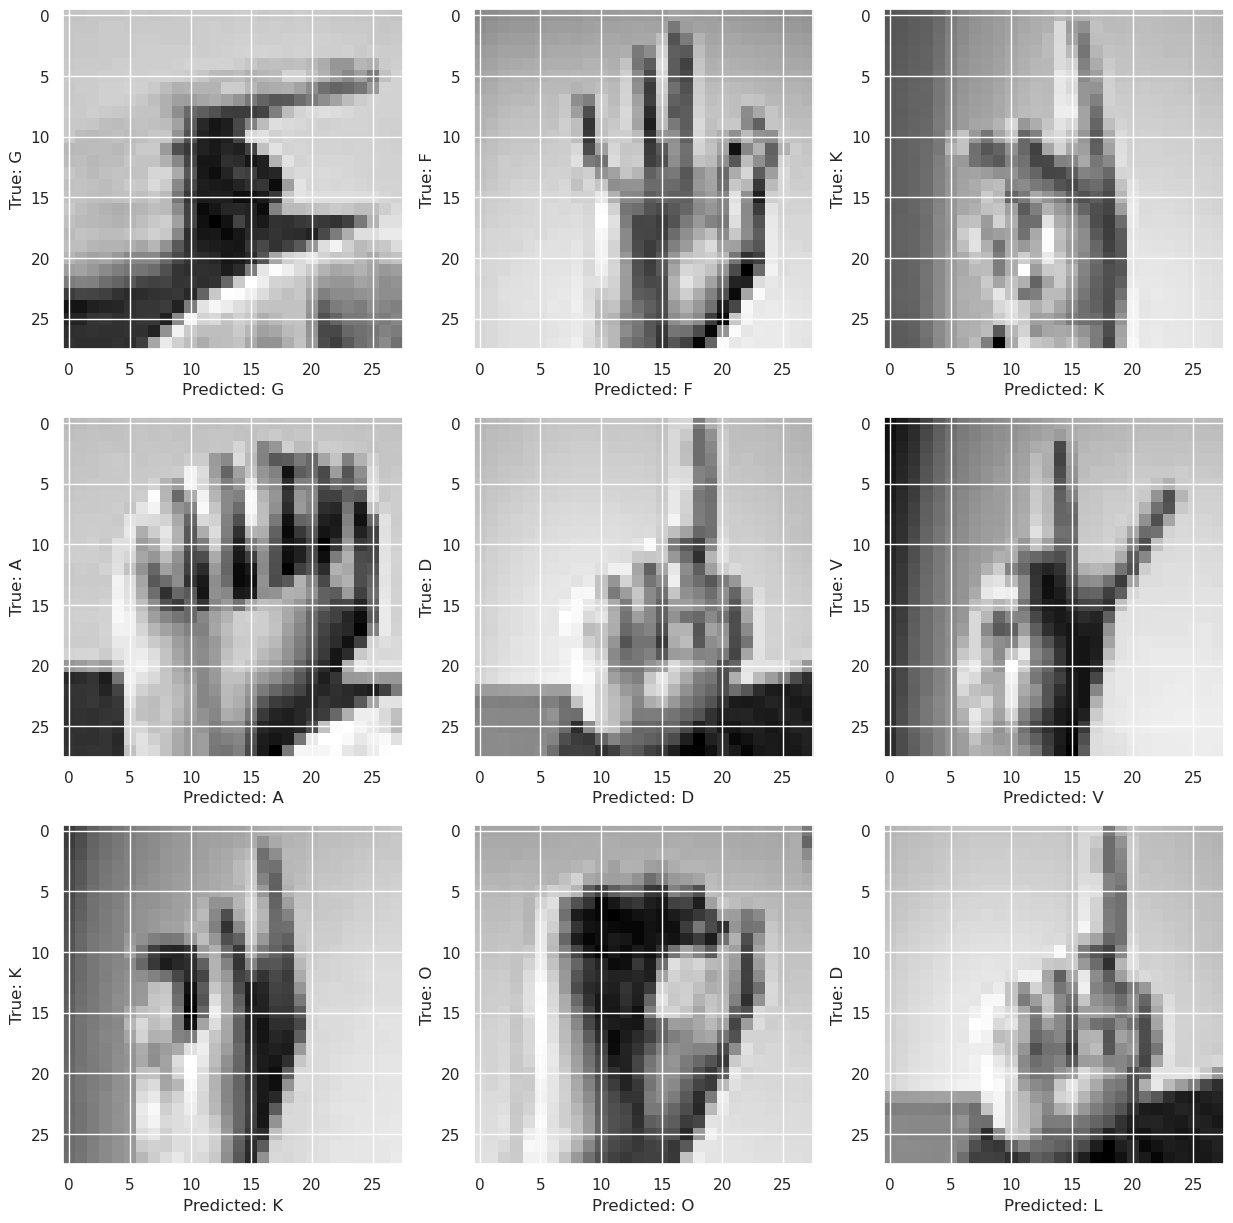

In [23]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")
    
plt.show()